# Experiment 2.5
Preliminary HPO exploration for Transformer because never really done before for TS

General takeaways from preliminary analysis:
Smaller models: larger lr is best (lr > 0.001)
Larger models: lr 0.0005 or 0.0001
Small horizon: bs 32
Large horizon: bs 64

Goal:</br>
HPO of Transformer on ftS load, pred_len=24 </br>

Result: </br>


In [519]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.5'

In [520]:
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300

## Import data and plot all benchmark results

In [521]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.5_metrics.csv", index_col=0)


In [522]:
hpo_table.sum(axis=0)

learning_rate         0.198000
batch_size         3840.000000
e_layers            440.000000
d_layers            400.000000
d_model           23808.000000
seq_len           25920.000000
pred_len           2880.000000
MSE                   3.719618
MAE                  15.510192
Epochs              928.000000
Time[min]          1172.000000
Params[Mio.]        818.880000
Max_mem[MB]      200075.840000
dtype: float64

In [523]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df.head(50)

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  \
45          0.0005          32         3         3      128      336   
29          0.0001          32         6         6      512      336   
83          0.0010          32         6         6       64      336   
85          0.0010          32         6         6      128      336   
73          0.0010          32         3         3       64      336   
27          0.0001          32         6         6      256      336   
53          0.0005          32         6         6       64      336   
17          0.0001          32         3         3      256      336   
111         0.0050          32         6         6       32      336   
47          0.0005          32         3         3      256      336   
75          0.0010          32         3         3      128      336   
19          0.0001          32         3         3      512      336   
57          0.0005          32         6         6      256      336   
55          0.0005          32         6         6      128      336   
43          0.0005          32         3         3       64      336   
9           0.0001          32         2         1      512      336   
25          0.0001          32         6         6      128      336   
37          0.0005          32         2         1      256      336   
93          0.0050          32         2         1       64      336   
84          0.0010          32         6         6      128       96   
39          0.0005          32         2         1      512      336   
103         0.0050          32         3         3       64      336   
67          0.0010          32         2         1      256      336   
63          0.0010          32         2         1       64      336   
81          0.0010          32         6         6       32      336   
72          0.0010          32         3         3       64       96   
110         0.0050          32         6         6       32       96   
101         0.0050          32         3         3       32      336   
38          0.0005          32         2         1      512       96   
65          0.0010          32         2         1      128      336   
7           0.0001          32         2         1      256      336   
71          0.0010          32         3         3       32      336   
15          0.0001          32         3         3      128      336   
18          0.0001          32         3         3      512       96   
16          0.0001          32         3         3      256       96   
46          0.0005          32         3         3      256       96   
26          0.0001          32         6         6      256       96   
102         0.0050          32         3         3       64       96   
56          0.0005          32         6         6      256       96   
35          0.0005          32         2         1      128      336   
66          0.0010          32         2         1      256       96   
28          0.0001          32         6         6      512       96   
33          0.0005          32         2         1       64      336   
82          0.0010          32         6         6       64       96   
42          0.0005          32         3         3       64       96   
54          0.0005          32         6         6      128       96   
52          0.0005          32         6         6       64       96   
91          0.0050          32         2         1       32      336   
34          0.0005          32         2         1      128       96   
36          0.0005          32         2         1      256       96   

     pred_len       MSE       MAE  Epochs  Time[min]  Params[Mio.]  \
45         24  0.022540  0.110274       8         10          1.39   
29         24  0.023106  0.110987      11         61         44.15   
83         24  0.023114  0.111765      10         20          0.70   
85         24  0.023321  0.111899       9         20

In [524]:
sorted_df.iloc[-3:]

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  pred_len  \
1          0.0001          32         2         1       32      336        24   
11         0.0001          32         3         3       32      336        24   
0          0.0001          32         2         1       32       96        24   

         MSE       MAE  Epochs  Time[min]  Params[Mio.]  Max_mem[MB]  
1   0.048824  0.166423      12          7          0.04       582.79  
11  0.049332  0.167201      11         11          0.09       996.17  
0   0.051181  0.172802       9          4          0.04       204.88

In [525]:
sorted_df.describe()

learning_rate  batch_size    e_layers    d_layers     d_model  \
count     120.000000       120.0  120.000000  120.000000  120.000000   
mean        0.001650        32.0    3.666667    3.333333  198.400000   
std         0.001968         0.0    1.706800    2.063420  175.300673   
min         0.000100        32.0    2.000000    1.000000   32.000000   
25%         0.000400        32.0    2.000000    1.000000   64.000000   
50%         0.000750        32.0    3.000000    3.000000  128.000000   
75%         0.002000        32.0    6.000000    6.000000  256.000000   
max         0.005000        32.0    6.000000    6.000000  512.000000   

          seq_len  pred_len         MSE         MAE      Epochs   Time[min]  \
count  120.000000     120.0  120.000000  120.000000  120.000000  120.000000   
mean   216.000000      24.0    0.030997    0.129252    7.733333    9.766667   
std    120.503147       0.0    0.005905    0.013480    3.080798    7.875858   
min     96.000000      24.0    0.022540    0.110274    4.000000    2.000000   
25%     96.000000      24.0    0.027018    0.119466    4.000000    5.000000   
50%    216.000000      24.0    0.029356    0.125175    8.000000    7.000000   
75%    336.000000      24.0    0.034116    0.136866   10.000000   11.000000   
max    336.000000      24.0    0.051181    0.172802   17.000000   61.000000   

       Params[Mio.]  Max_mem[MB]  
count    120.000000   120.000000  
mean       6.824000  1667.298667  
std       11.652966  1678.379504  
min        0.040000   204.880000  
25%        0.180000   483.240000  
50%        1.390000  1058.025000  
75%       10.520000  2110.440000  
max       44.150000  7623.160000

In [526]:
average_model = sorted_df.iloc[0:10].describe().iloc[1:3]
best_model = sorted_df.iloc[0:3]
worst_model = sorted_df.iloc[-1:]

overview_models = pd.concat([average_model, worst_model, best_model], axis=0)

overview_models.rename(index={"mean":"Mean Top10", "std":"Std Top10", 45: "Top1 model",  0: "Worst model"}, inplace=True)
overview_models.drop(columns=["MAE", "batch_size", "d_layers", "Time[min]", "Max_mem[MB]", "pred_len"], inplace=True)
overview_models.rename(columns={"learning_rate": "Lr", "e_layers": "Enc. layers", "d_model": "D. model", "seq_len": "Seq. len."}, inplace=True)
overview_models = overview_models.sort_index(axis=1)
overview_models = overview_models.round(4)
mse_column, lr_column, epoch_column = overview_models.pop("MSE"), overview_models.pop("Lr"), overview_models.pop("Epochs")
overview_models.insert(4, "Epochs", epoch_column)
overview_models= overview_models.round(2)

overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]] = overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]].astype(int)

overview_models.insert(0, "Lr", lr_column)
overview_models.insert(6, "MSE", mse_column)
overview_models


Lr  D. model  Enc. layers  Params[Mio.]  Seq. len.  Epochs  \
Mean Top10   0.0010       176            4          7.24        336       9   
Std Top10    0.0015       147            1         13.42          0       1   
Worst model  0.0001        32            2          0.04         96       9   
Top1 model   0.0005       128            3          1.39        336       8   
29           0.0001       512            6         44.15        336      11   
83           0.0010        64            6          0.70        336      10   

                MSE  
Mean Top10   0.0234  
Std Top10    0.0004  
Worst model  0.0512  
Top1 model   0.0225  
29           0.0231  
83           0.0231

In [527]:
overview_models.to_latex("./../../results/figures_latex/hpo_transformer_24_overview.tex", escape=False, )

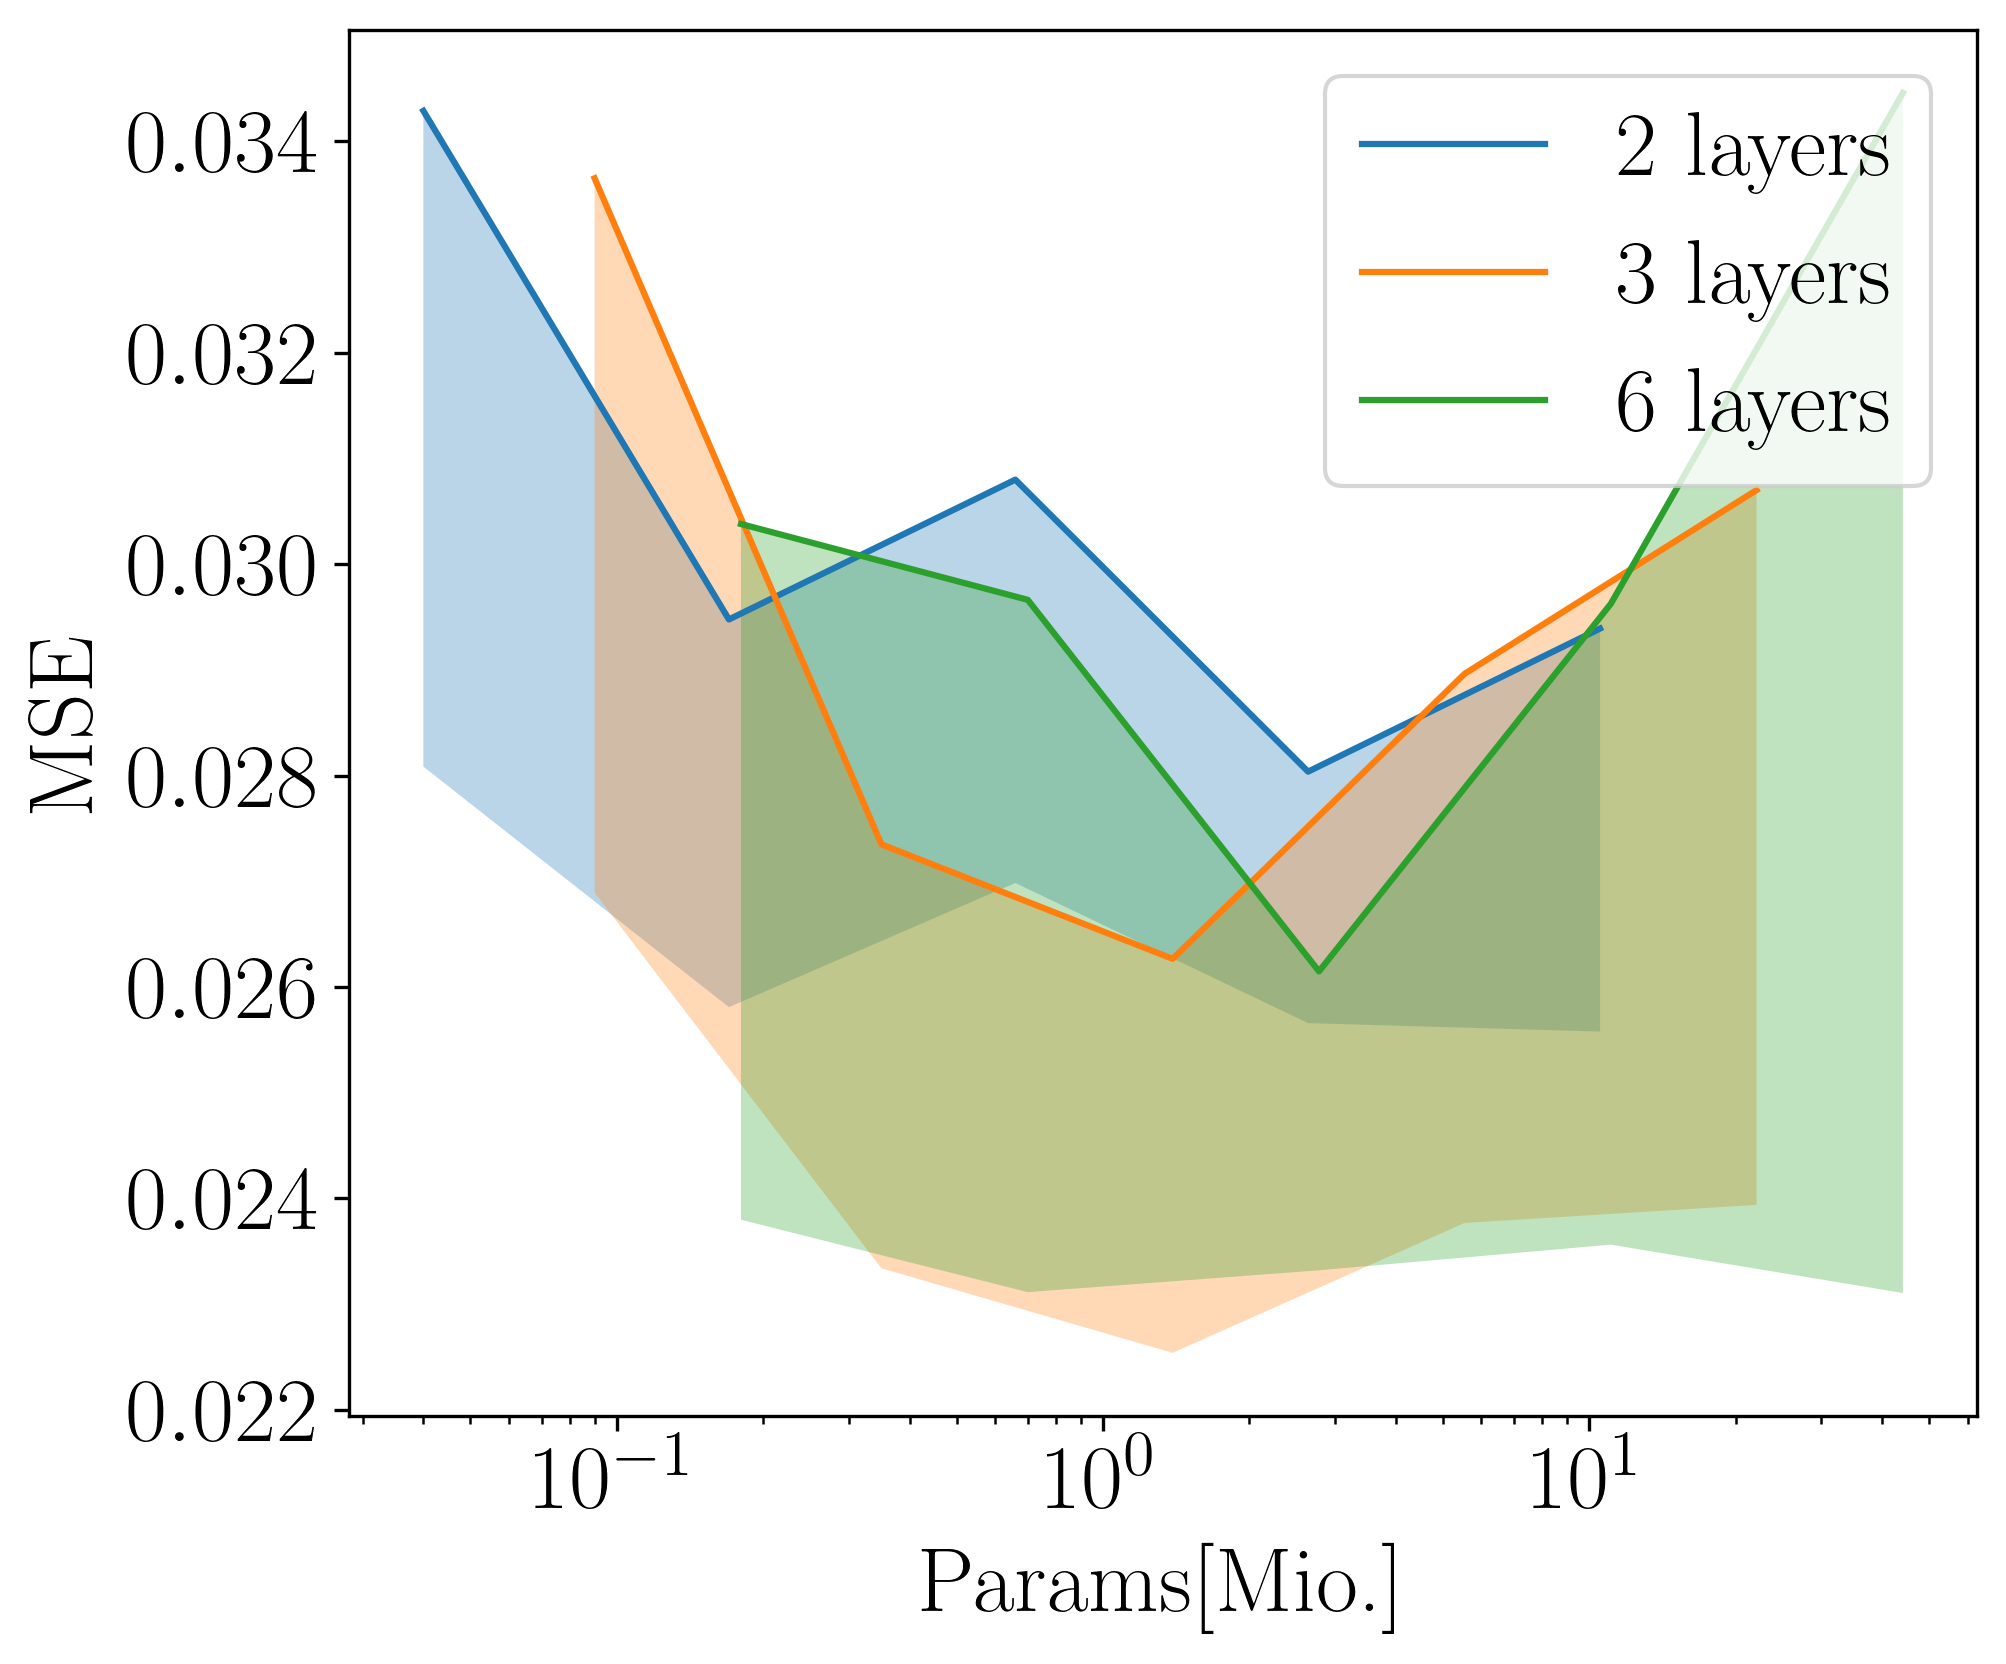

In [528]:
matplotlib.rcParams.update({'font.size': 22})

mc_table = hpo_table[hpo_table["seq_len"]==336].groupby(["e_layers", "Params[Mio.]"]).mean()
mc_min_table = hpo_table[hpo_table["seq_len"]==336].groupby(["e_layers", "Params[Mio.]"]).min()
#print(mc_table)
#print(mc_table.xs(2, level="e_layers").index)

#Plot MSE over Params. Each e_layer has a different color
fig, ax = plt.subplots(1,1,figsize=(7, 6))
for i in [2,3,6]:
    ax.plot(mc_table.xs(i, level="e_layers").index, mc_table.xs(i, level="e_layers")["MSE"], label=f"{i} layers")
    ax.fill_between(mc_table.xs(i, level="e_layers").index, mc_min_table.xs(i, level="e_layers")["MSE"], mc_table.xs(i, level="e_layers")["MSE"], alpha=0.3)

ax.set_xlabel("Params[Mio.]")
ax.set_ylabel("MSE")
ax.legend(loc="upper right")
ax.set_xscale("log")
plt.show()

## Learning rate vs MSE

## Params[Mio.] vs MSE

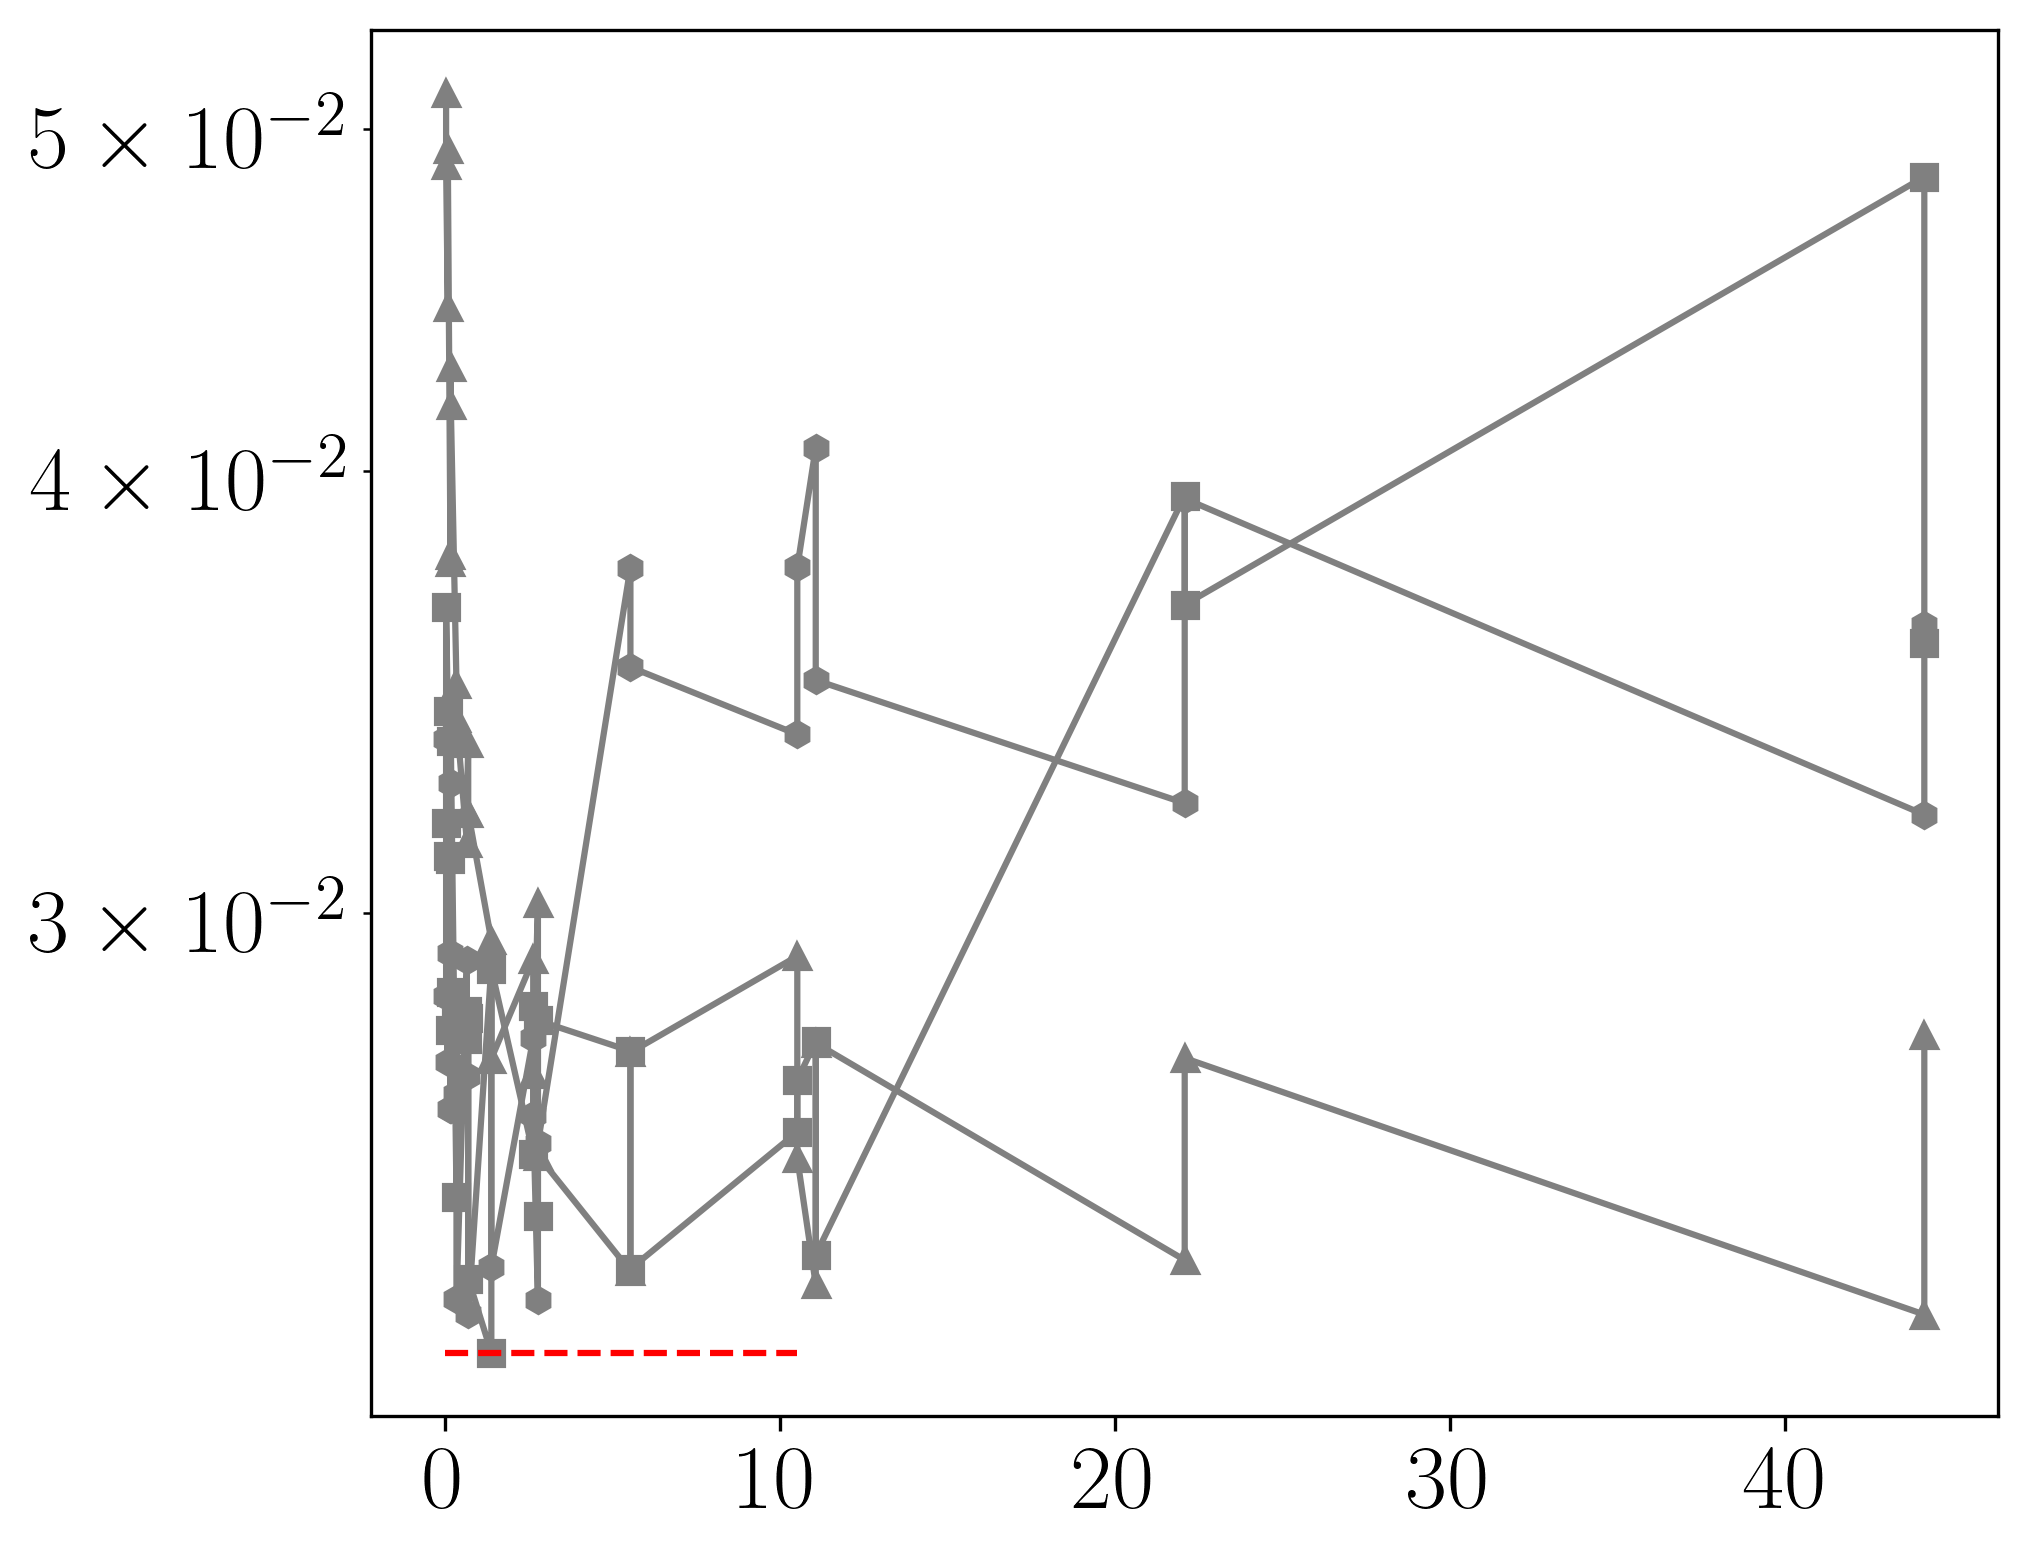

In [529]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.00001: 'o', 0.0001: '^', 0.0005: 's', 0.001: 'h'}
batch_sizes = [32, 64, 128]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0001, 0.0005, 0.001]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
for lr in learning_rates:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[lr])

ax.set_yscale("log")

ax.hlines(best_mse, 0,10.5, color="red", linestyles="--")
#ax.set_ylim(0.02, 0.08)



In [530]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  \
91          0.0050          32         2         1       32      336   
61          0.0010          32         2         1       32      336   
90          0.0050          32         2         1       32       96   
31          0.0005          32         2         1       32      336   
60          0.0010          32         2         1       32       96   
..             ...         ...       ...       ...      ...      ...   
88          0.0010          32         6         6      512       96   
58          0.0005          32         6         6      512       96   
89          0.0010          32         6         6      512      336   
118         0.0050          32         6         6      512       96   
59          0.0005          32         6         6      512      336   

     pred_len       MSE       MAE  Epochs  Time[min]  Params[Mio.]  \
91         24  0.028086  0.124510       7          4          0.04   
61         24  0.028432  0.124961      11          6          0.04   
90         24  0.029538  0.126754      10          5          0.04   
31         24  0.031814  0.131835      11          6          0.04   
60         24  0.033611  0.133617       9          4          0.04   
..        ...       ...       ...     ...        ...           ...   
88         24  0.031989  0.130928       4          7         44.15   
58         24  0.035767  0.139535       4          7         44.15   
89         24  0.036194  0.145367       4         21         44.15   
118        24  0.036491  0.141869       4          7         44.15   
59         24  0.048452  0.168916       4         21         44.15   

     Max_mem[MB]  
91        582.79  
61        582.79  
90        204.88  
31        582.79  
60        204.88  
..           ...  
88       2281.85  
58       2281.85  
89       7623.16  
118      2281.85  
59       7623.16  

[120 rows x 13 columns]

In [531]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model"]]
print(reduced_hpo_table.shape)

(120, 7)


In [532]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(7, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    ynames = column_names if ynames is None else ynames
        
    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    # Normalize data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter for better visibility
    jitter_strength = 0.00005 
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, 0] = np.random.normal(0, 0.00005, zs[:, 0].shape)
    jitter[:, -1] = 0  # Don't jitter the last column
    zs += jitter
    #zs[:, -2][zs[:, -2] < 0] = 0 # Avoid negative values

    # Create the parallel coordinates
    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        ax.tick_params(axis='y', labelsize=22)
        ax.tick_params(axis='x', length=0)
            #ax.set_yscale('log')
        
    #axes[-3].set_yscale('log')
    

    host.set_xlim(0, ys.shape[1] - 1) 
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=22)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    #host.set_title('Parallel Coordinate Plot Transformer pred_len 24', fontsize=22)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    sm = ScalarMappable(norm=color_norm, cmap=cmap)
    sm.set_array([])

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)
    
    # Bring MSE axis to front (before color bar)
    axes[-1].set_zorder(10) 
    
    # Color bar
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="16%", pad=0.0)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.yaxis.set_ticks([])
  
    plt.tight_layout()
    plt.show()


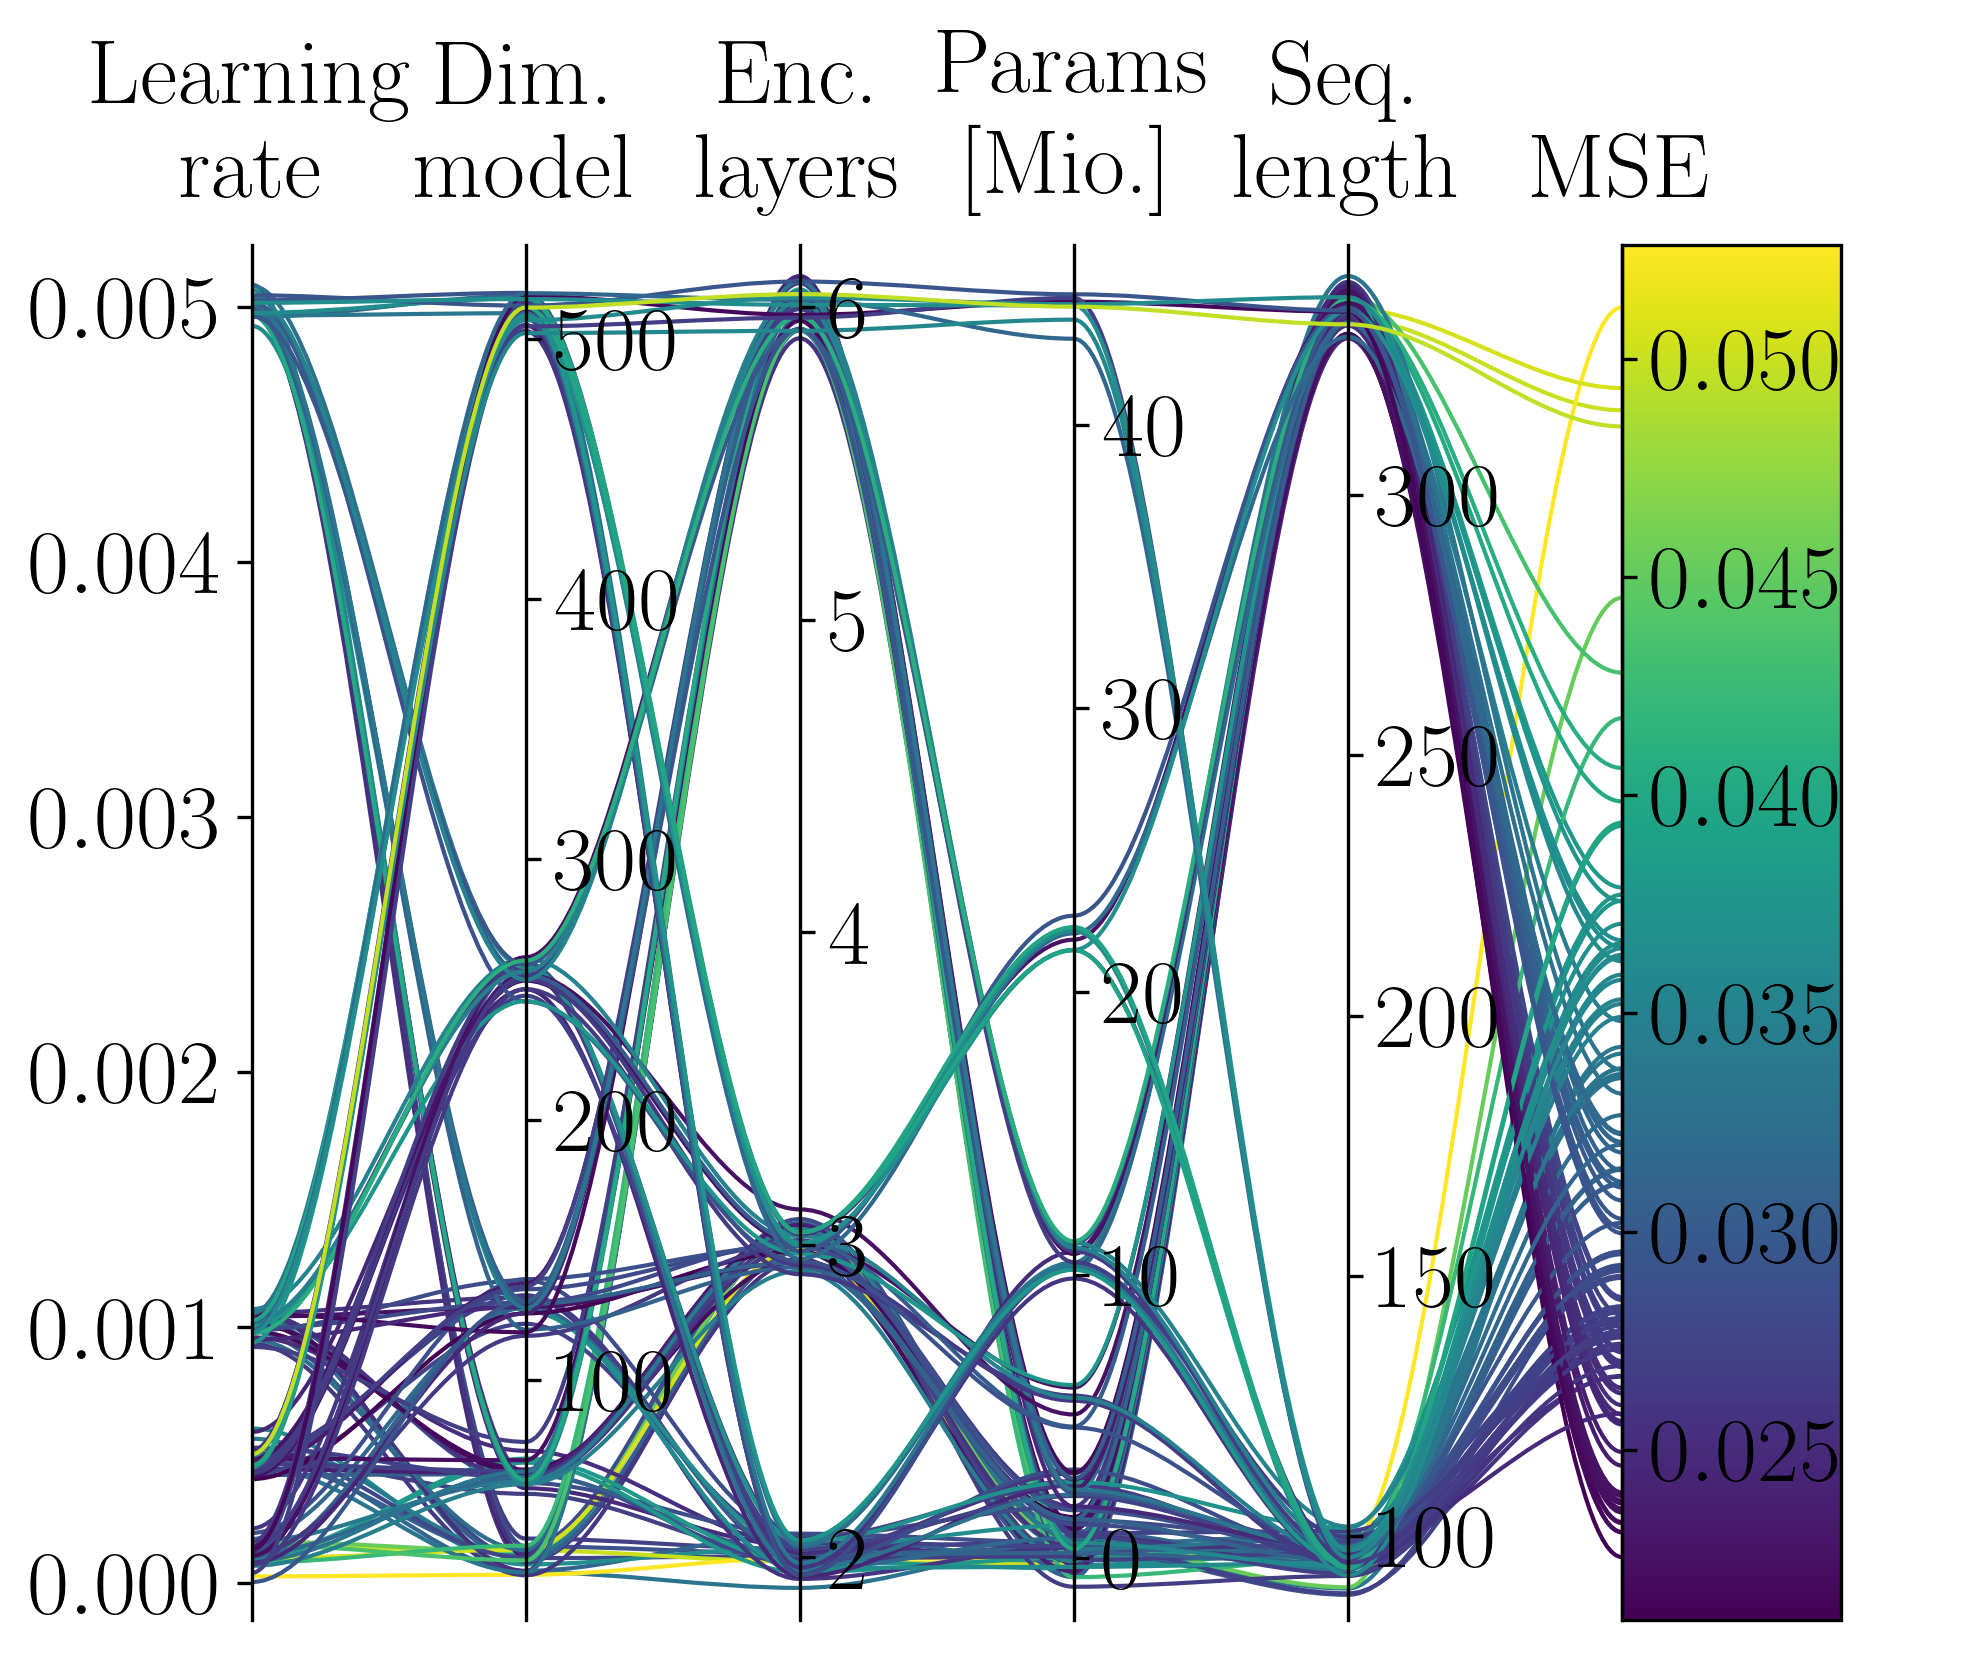

In [533]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], ynames=["Learning \n rate", "Dim. \n model", "Enc. \n layers", "Params \n [Mio.]", "Seq. \n length", "MSE"])
#plt.savefig("./../../results/figures_latex/parallel_coordinates.png", bbox_inches='tight')

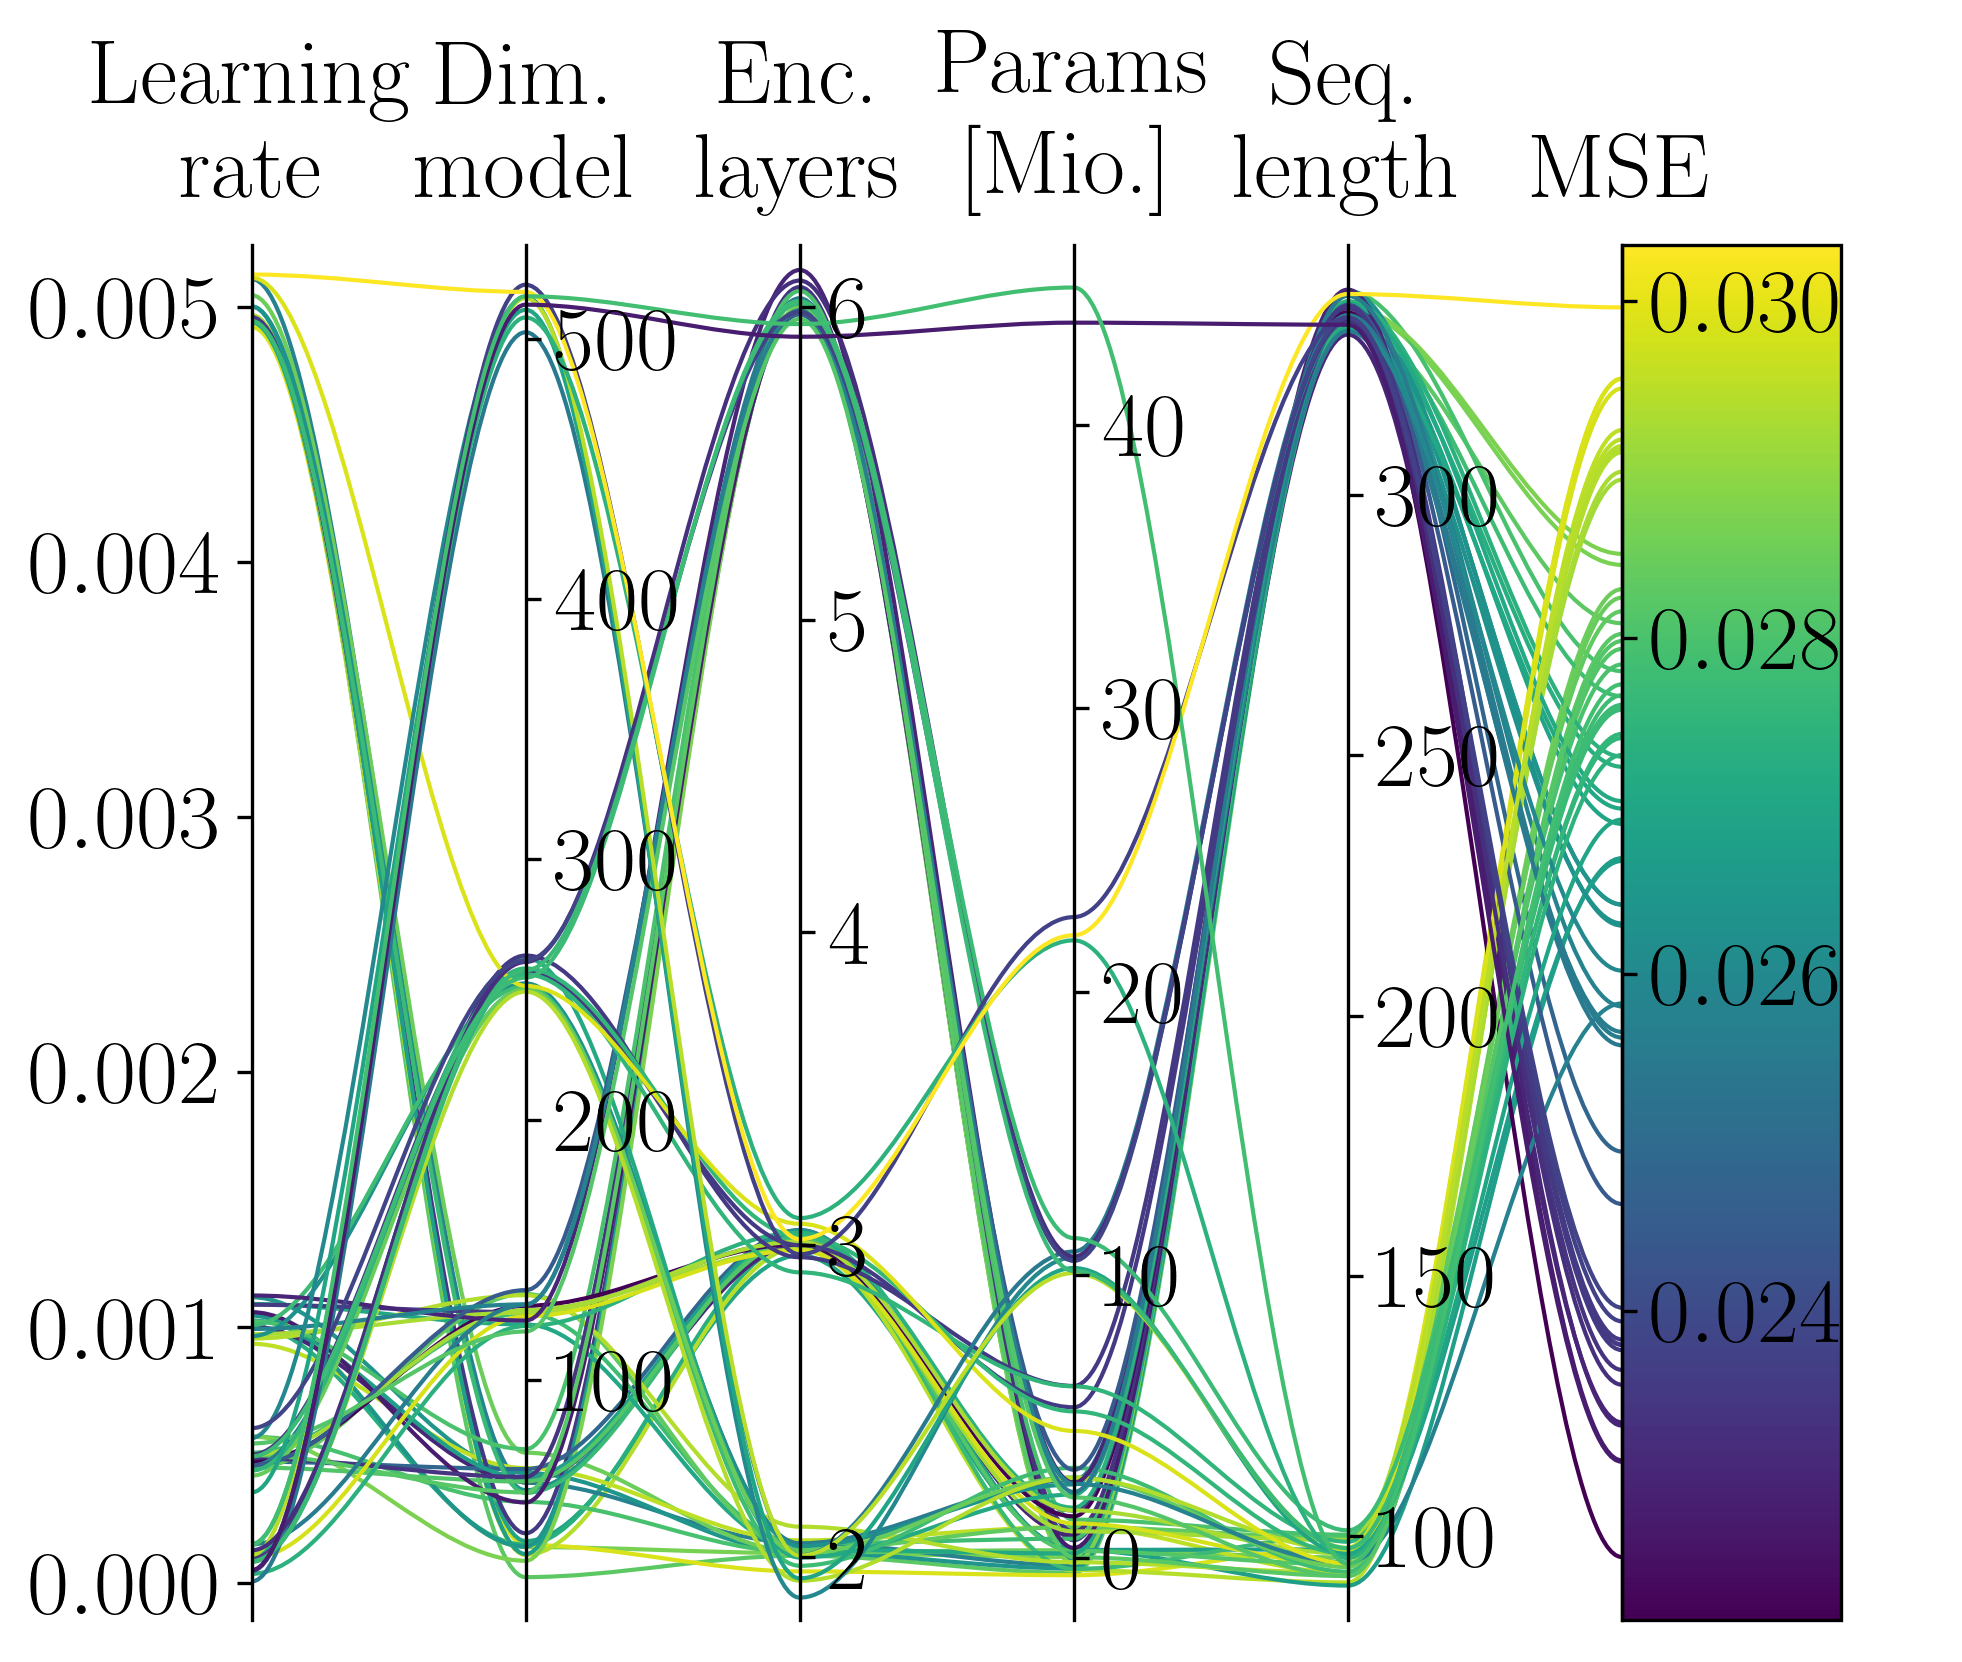

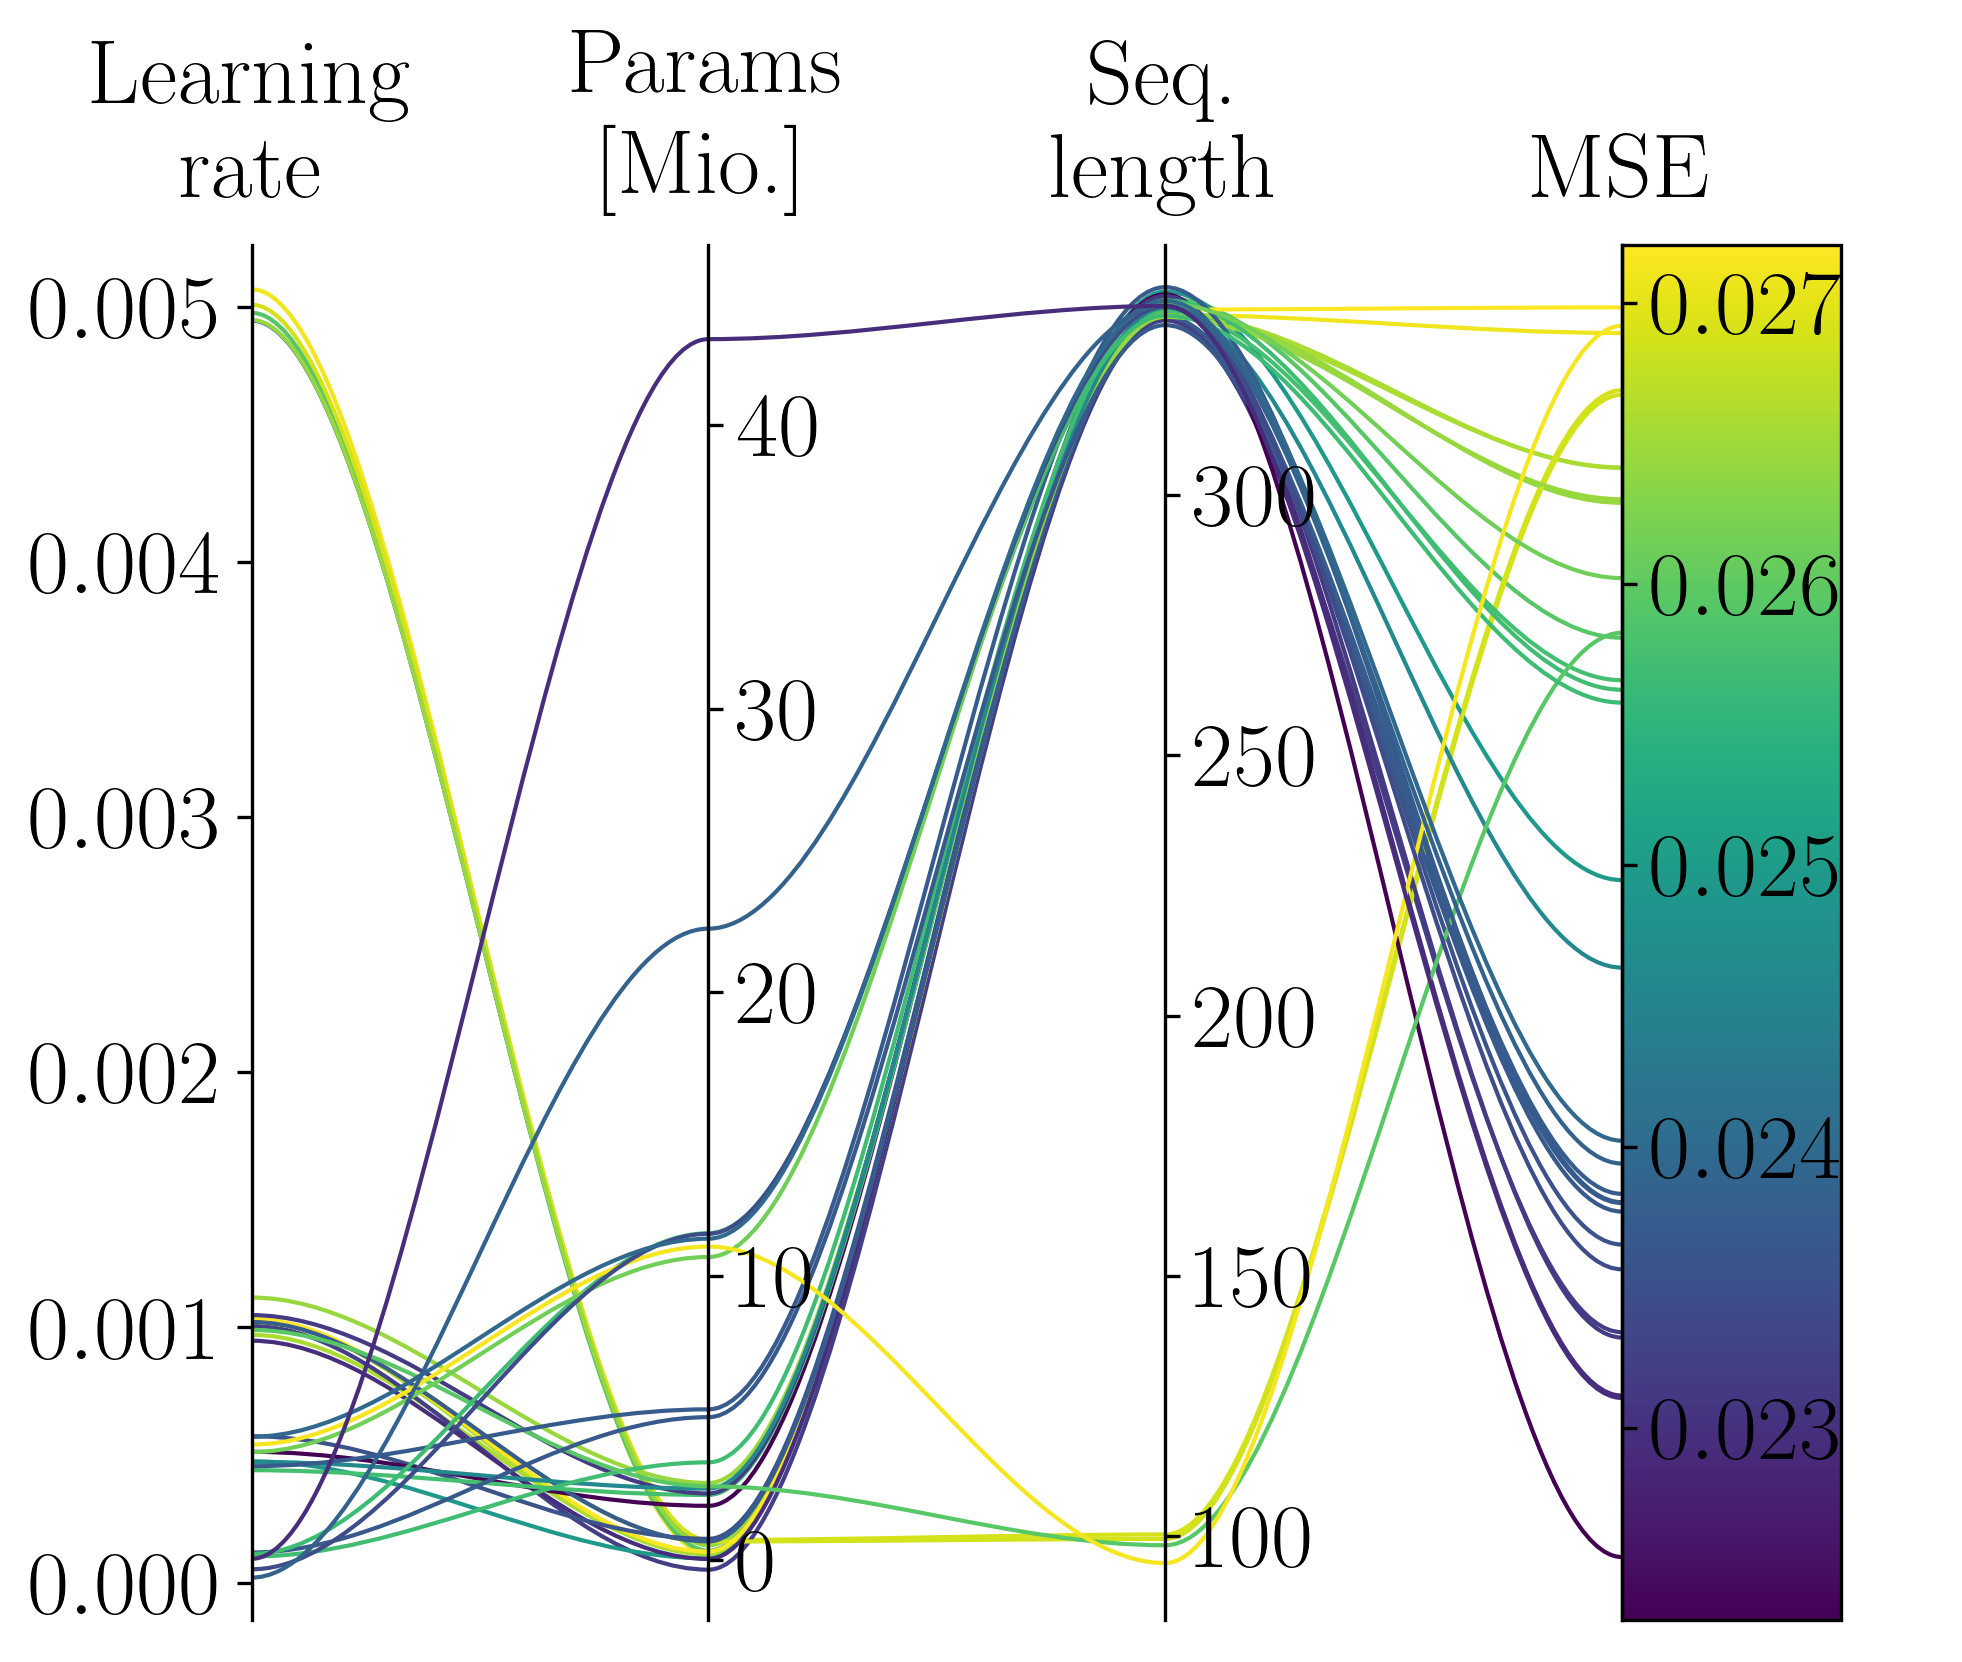

In [534]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.03, ynames=["Learning \n rate", "Dim. \n model", "Enc. \n layers", "Params \n [Mio.]", "Seq. \n length", "MSE"])
parallel_coordinates(reduced_hpo_table, ["learning_rate", "Params[Mio.]", "seq_len", "MSE"], threshold=0.027, ynames=["Learning \n rate", "Params \n [Mio.]", "Seq. \n length", "MSE"])

ValueError: zero-size array to reduction operation minimum which has no identity

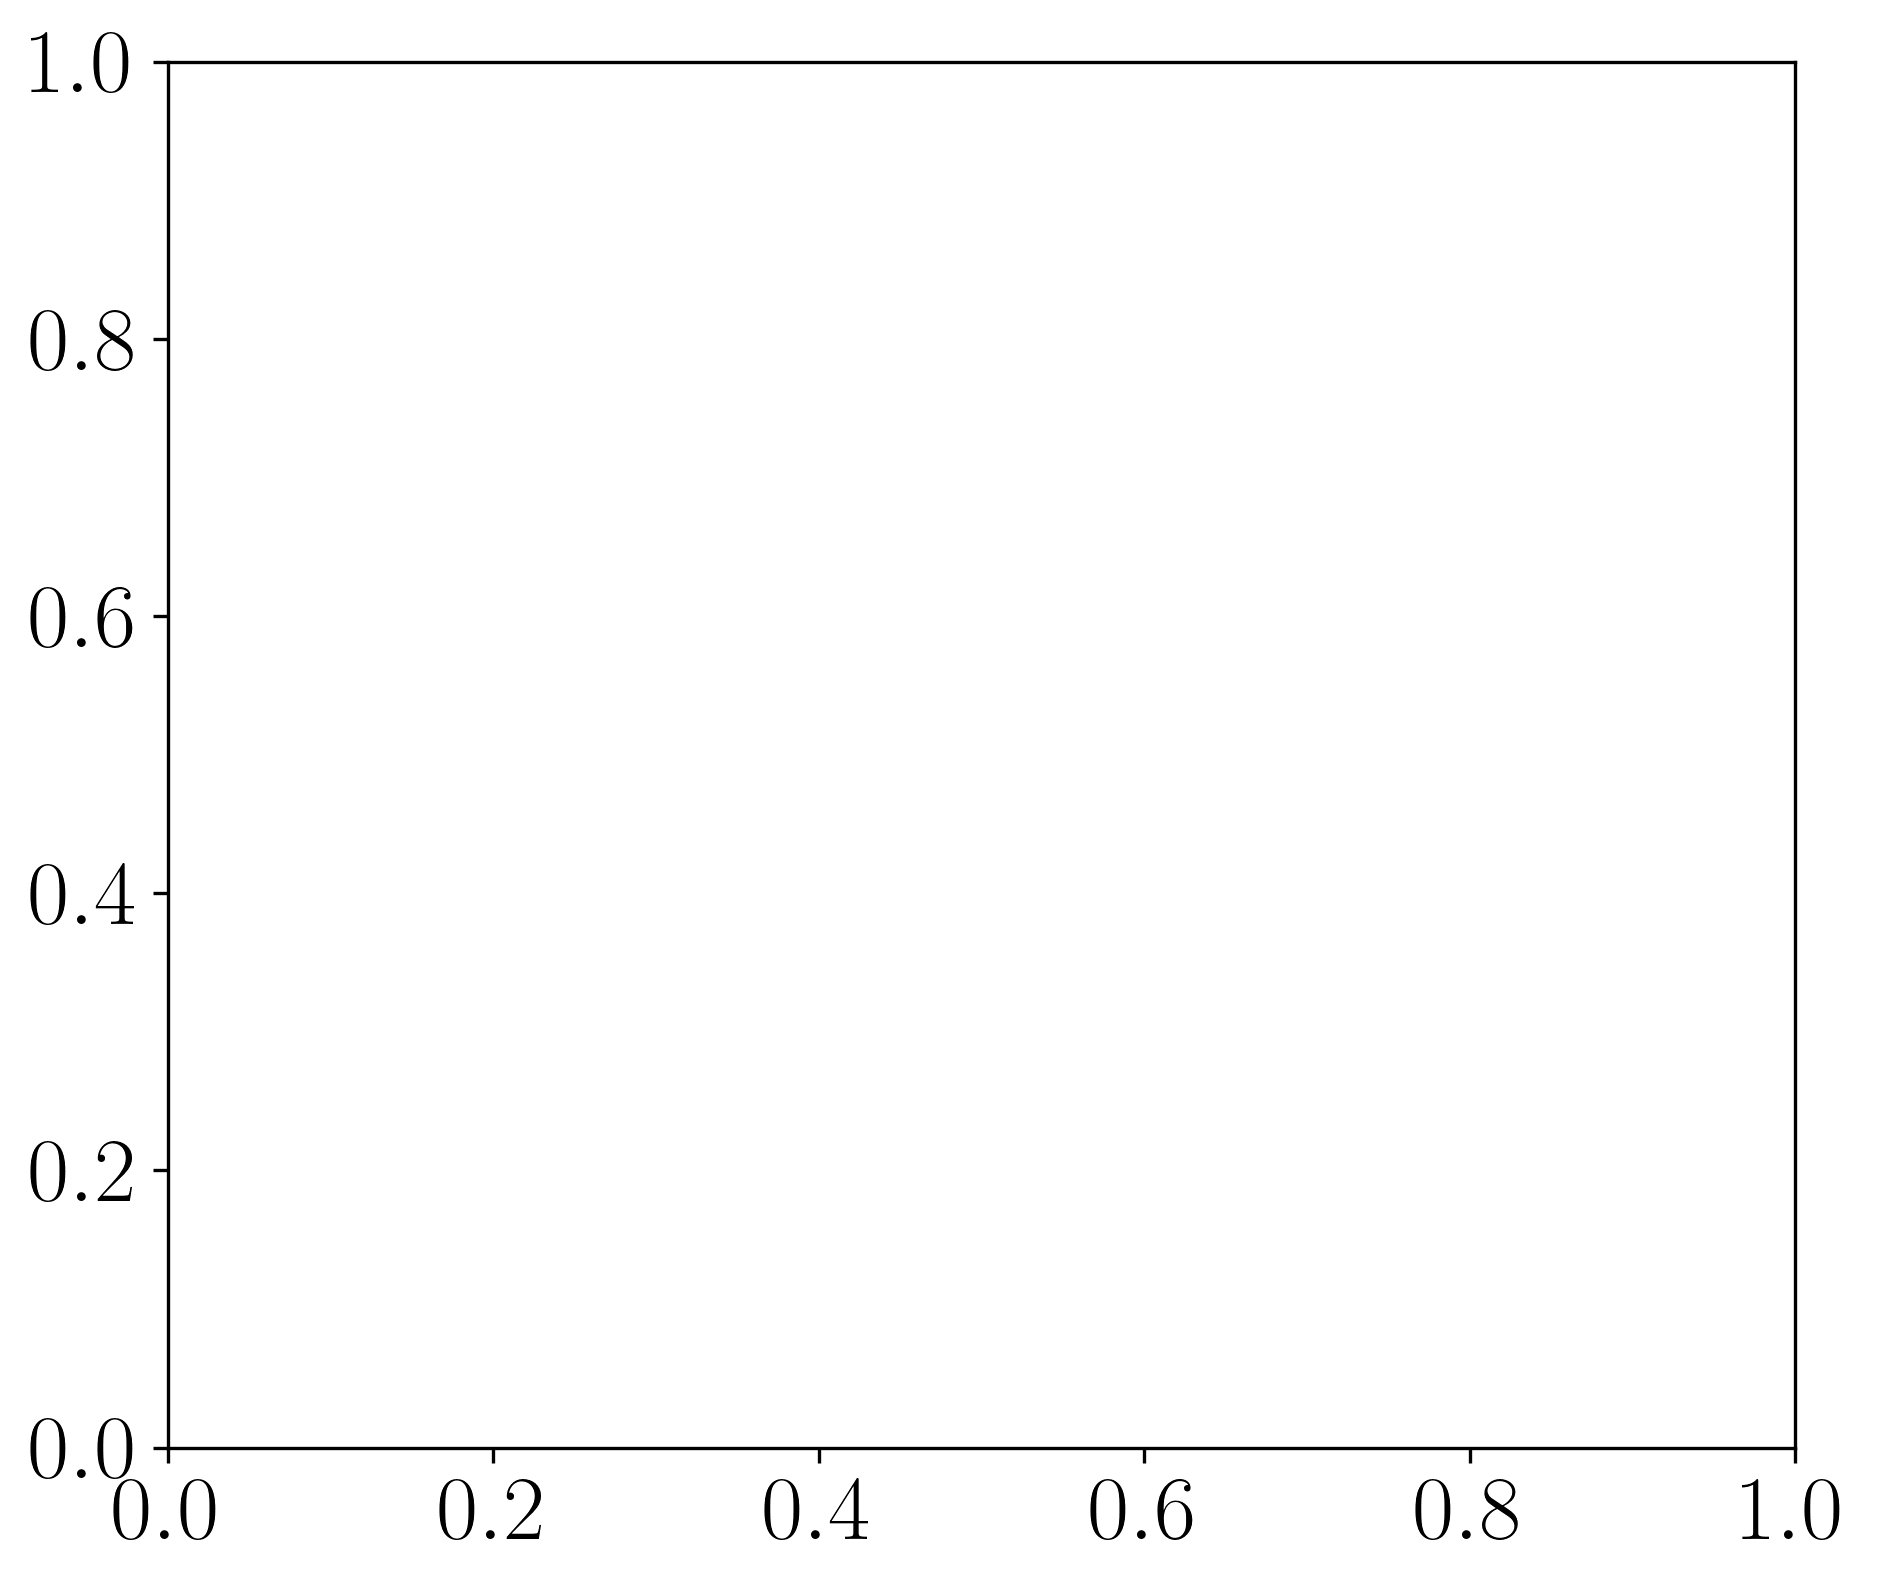

In [535]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.0], ["learning_rate", "batch_size", "MSE"])


/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_12066/668292155.py:33: RuntimeWarning: invalid value encountered in divide
  zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_12066/668292155.py:47: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymins[i], ymaxs[i])


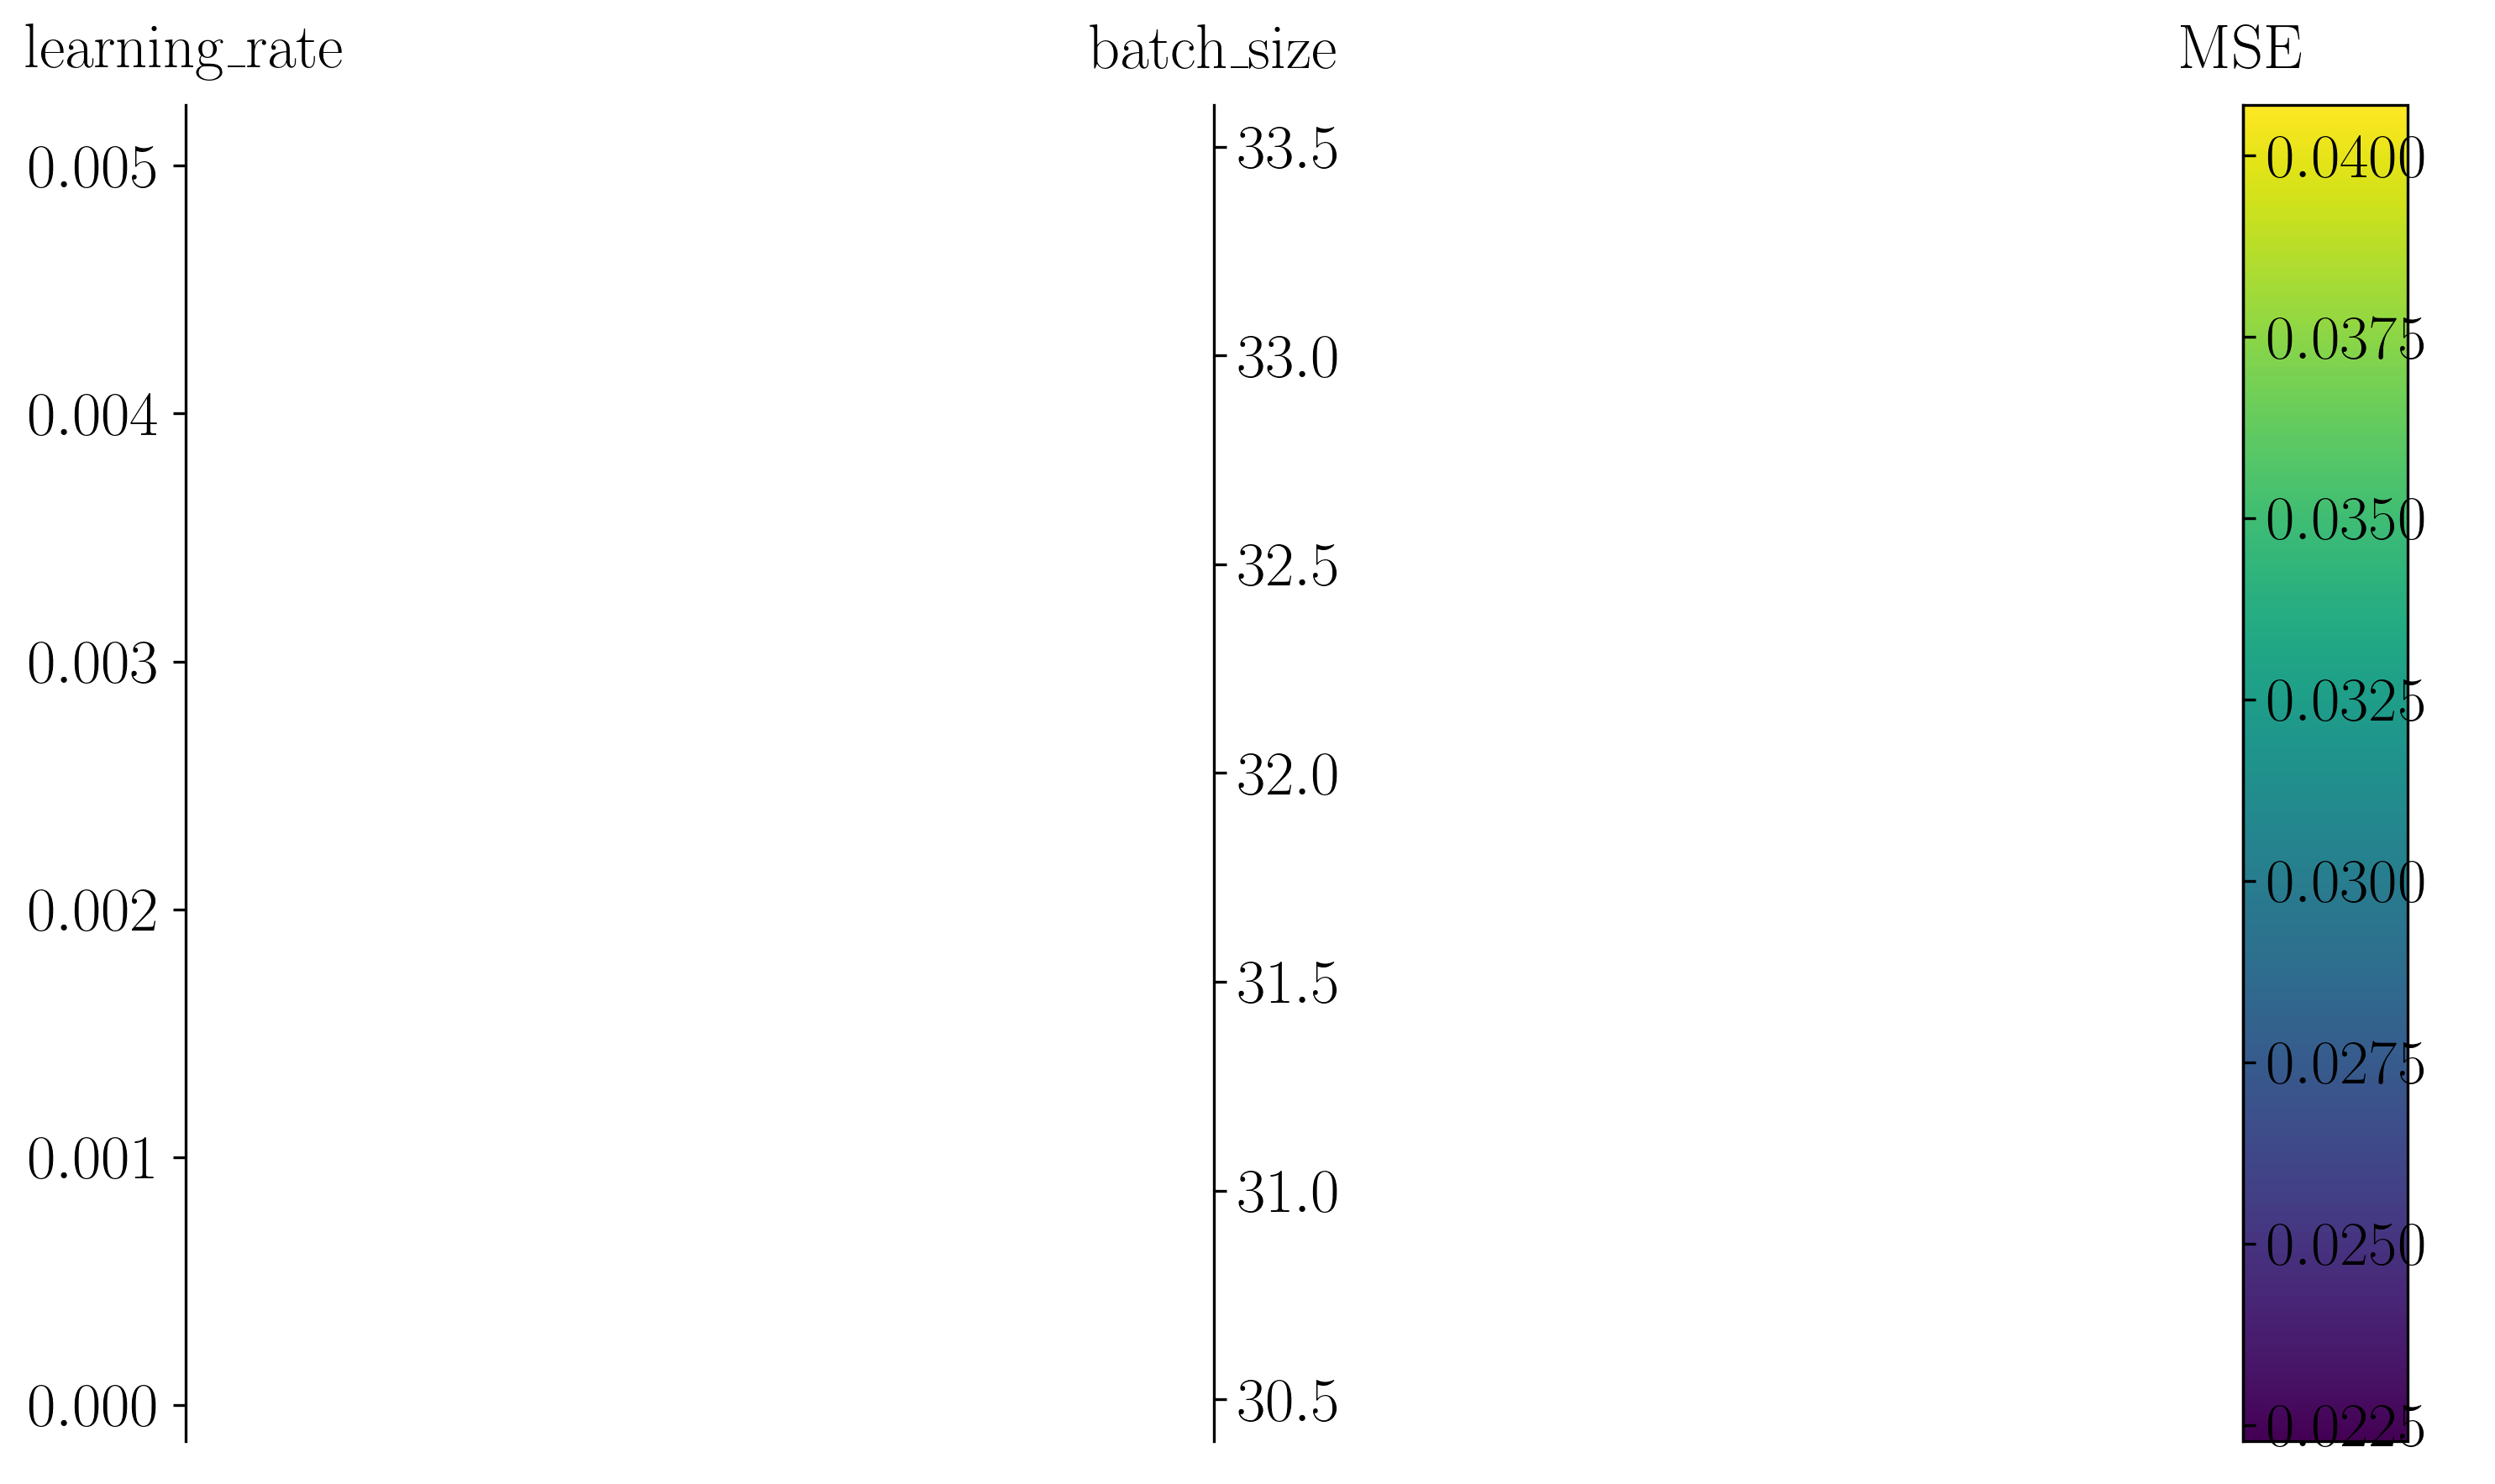

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.7], ["learning_rate", "batch_size", "MSE"])

ValueError: zero-size array to reduction operation minimum which has no identity

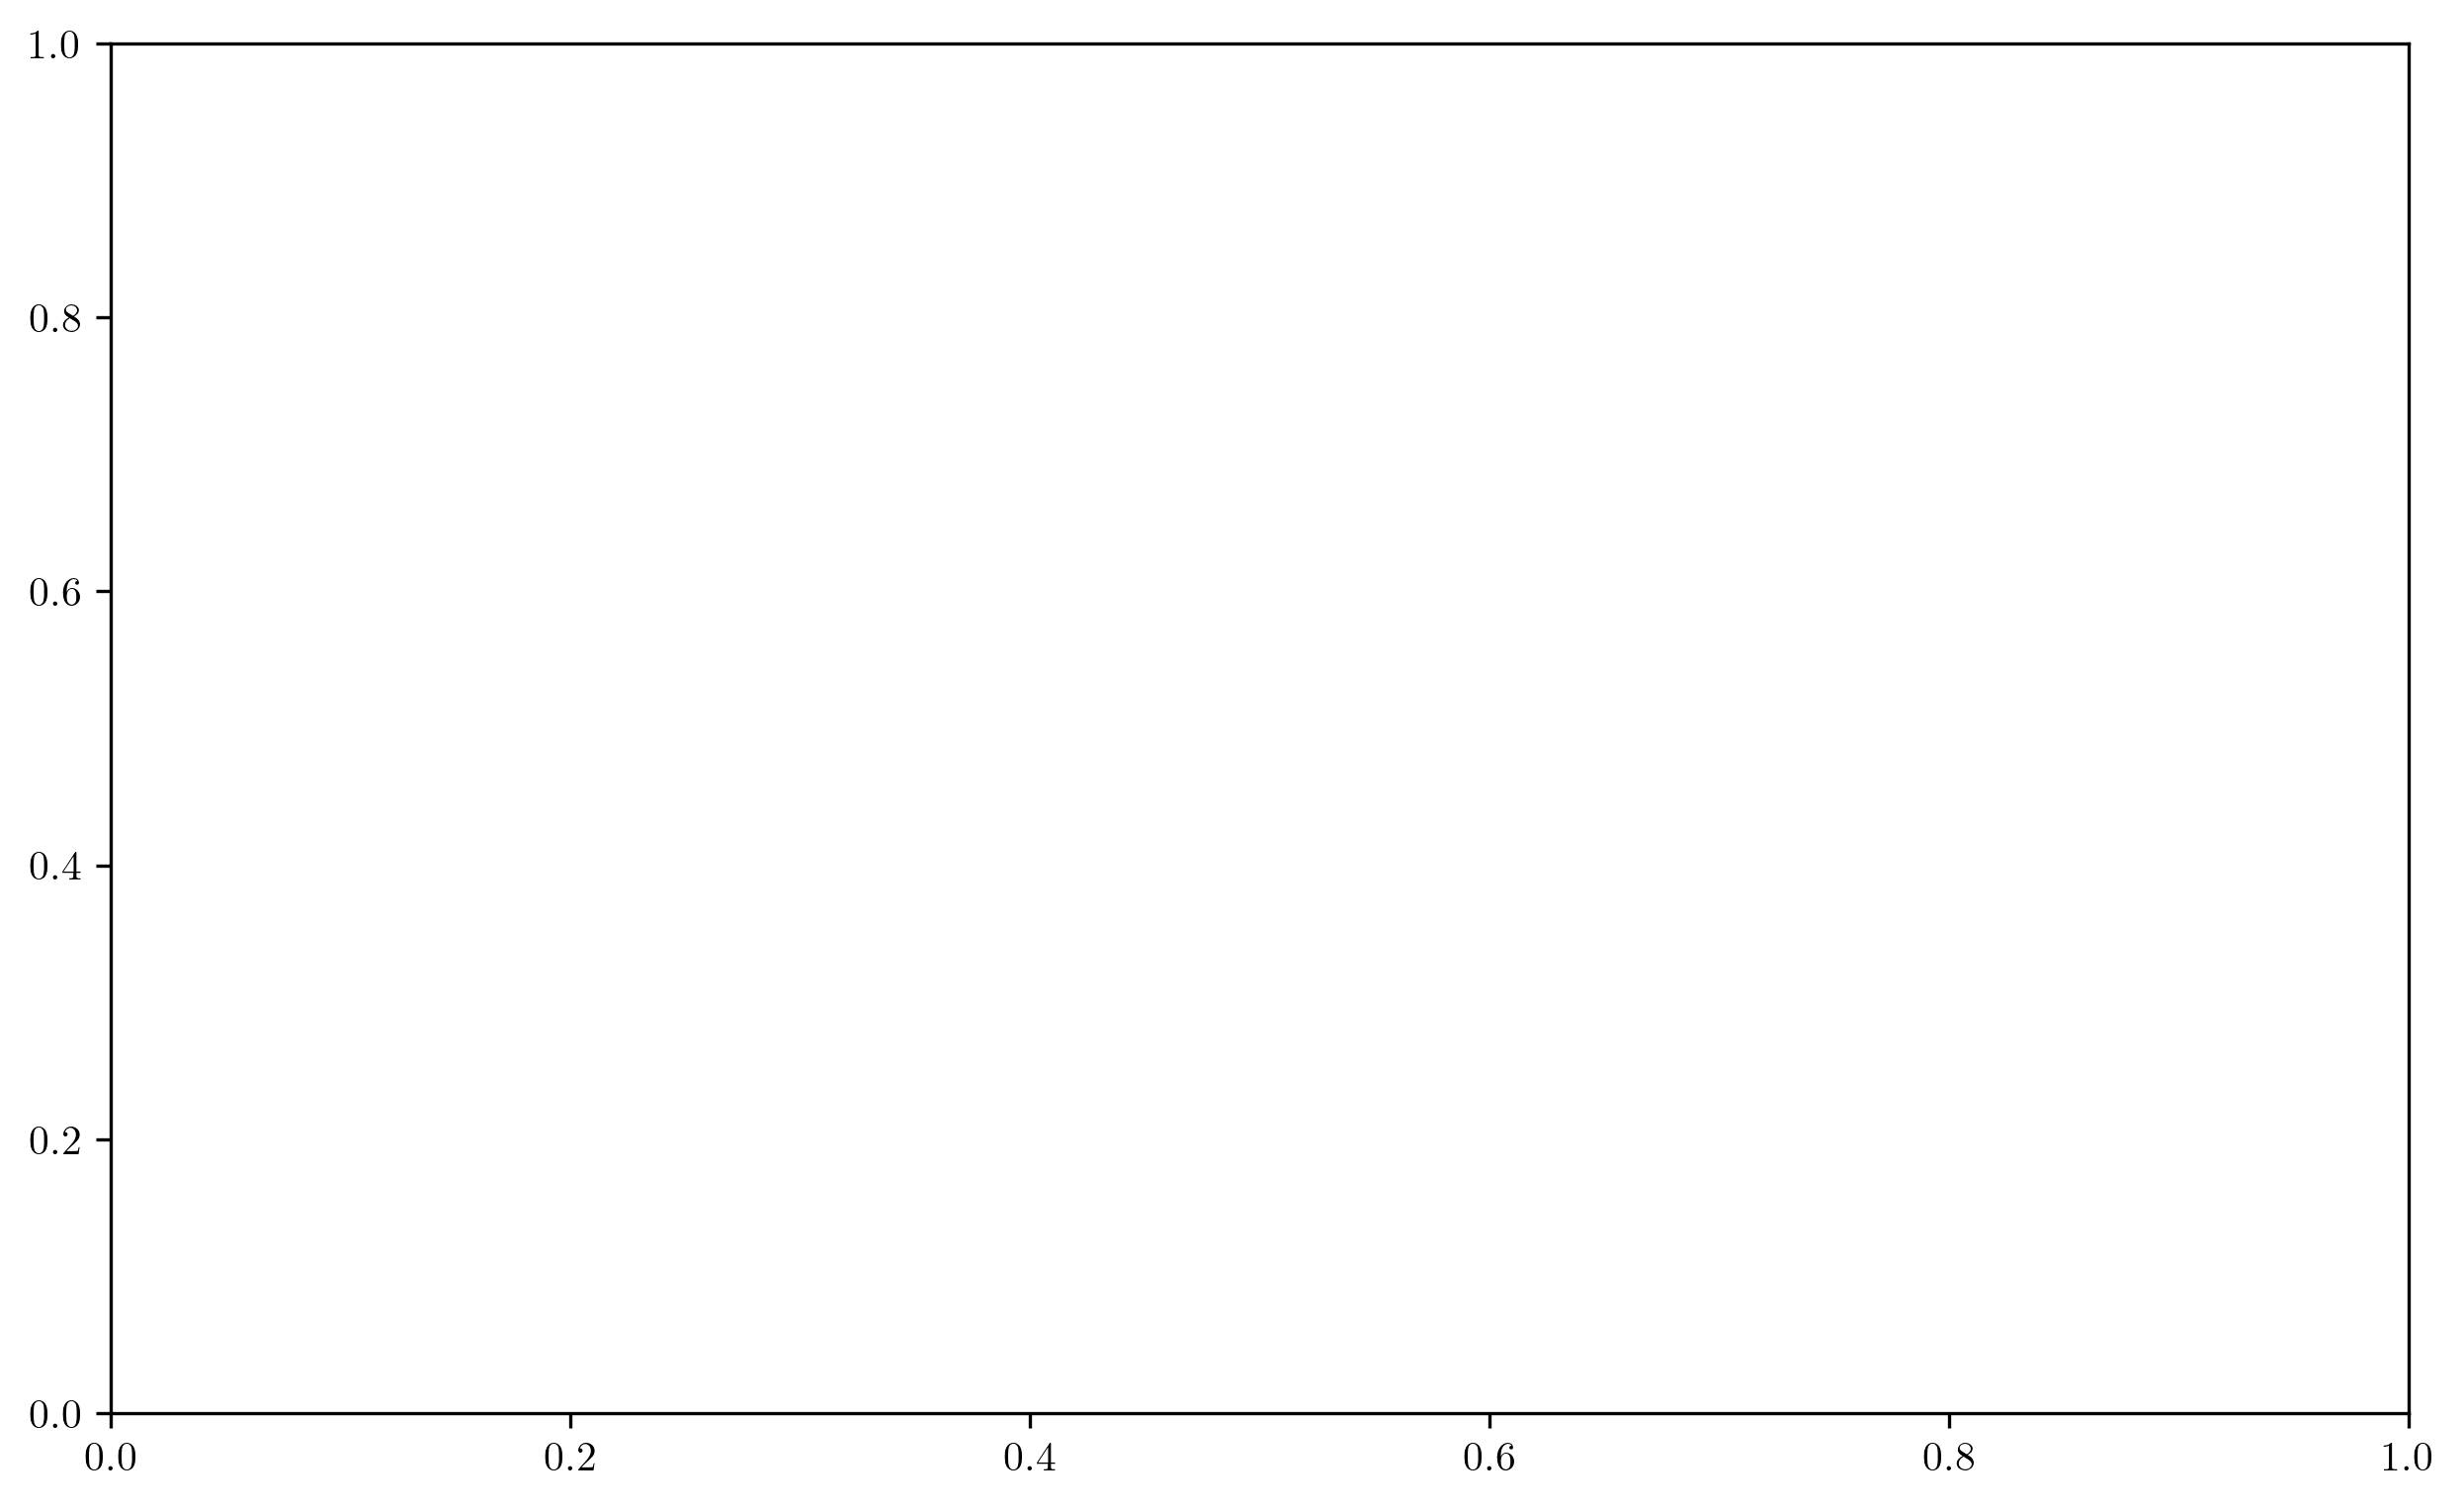

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"], threshold = 0.08)

(12, 3)


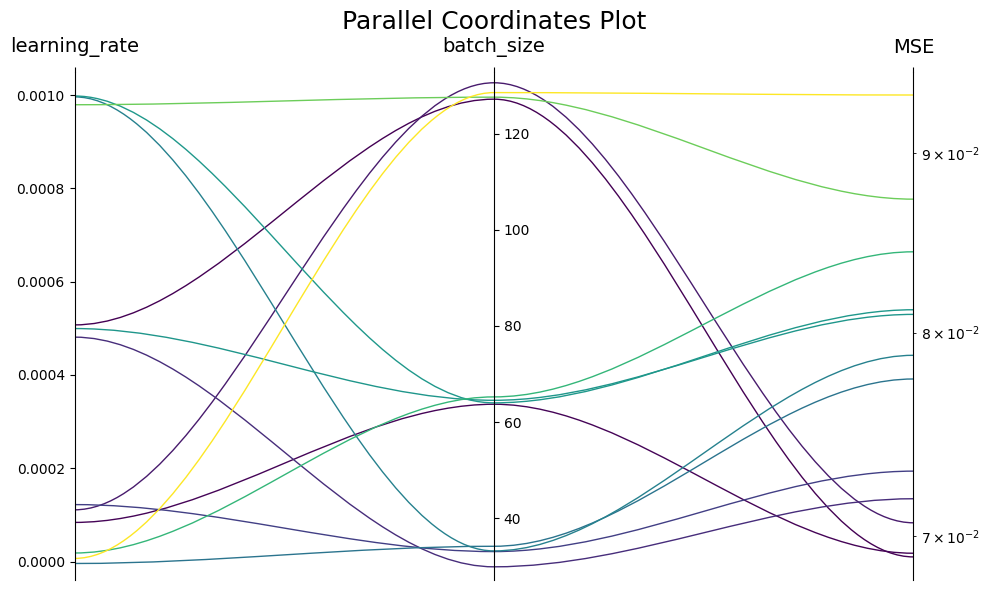

(7, 3)


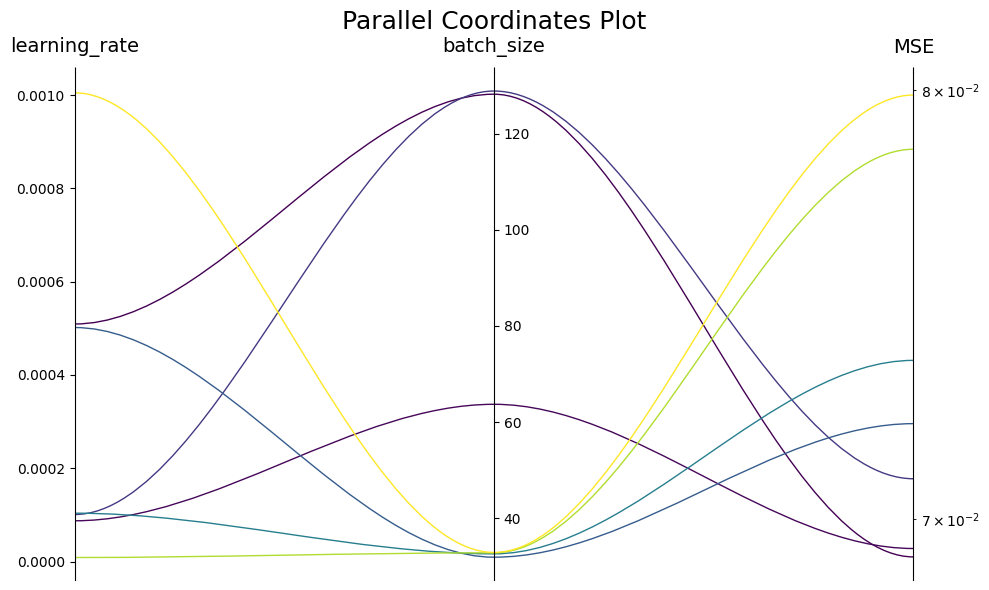

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"], threshold=0.08)